<a href="https://colab.research.google.com/github/Tejaswini123Charku/HDS5210/blob/main/final/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## HDS 5210 FINAL PROJECT
Name: Tejaswini Charku


## Background

##### This project has seven parts, which performs the following actions:
##### 1. Analyzing the risks for sample of patients along with data visualization.
##### 2. Calculating the risk using a Dummy score for the patients and to run it on a sample dataset.
##### 3. Calculating the stage of cancer.
##### 4. Suggesting the Drugs.
##### 5. Suggesting the chemotherapy requirements.
##### 6. Suggesting the drugs for residual cancer after chemotherapy.
##### 7. Runs the calculator on the population.

In [4]:
!pip install pandasql

### Importing the Modules

In [5]:
import pandas as pd
import os
import numpy as np
import requests
from bs4 import BeautifulSoup
import json
import ast
import pandasql as ps
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

## PART 1


#### In this section the 2019 data of recovered, under_treatment, died patients existing in three excel files are analysed and visulaized.The features of this data are described as bellow:

##### 1) patient_id: the id of the patient,
##### 2) gender: the gender of the patient which “Female” is 0 and “Male” is 1
##### 3) education: the education levels of the patient which Illiterate=0, Elementary= 1, Middle School =2 , High School =3 , Diploma = 4, Associate =5 , Bachelor =6 ,                       Master = 7
##### 4) treatment_date : the date(year) which the patient would receive the treatment
##### 5) id_healthcenter : is the id for the healthcare center
##### 6) idtreatmentregion: the region which the patient would receive the treatment
##### 7) hereditary_history: the patient has the hereditary history of disease which 1 means “Yes” and 0 means “No”
##### 8) birth_date: birth date (year) of the patient
##### 9) age: the age of the patient
##### 10) weight: the weight of the patient
##### 11) thickness_tumor: the thickness of the tumor detected in the patient body
##### 12) marital_status: the marital status of the patient includes : 1 means married and 0 means single
##### 13) marital_length: the age of the martial status includes 0 means under 10 years, 1 means above 10 years
##### 14) pregnency_experience: the patient has the pregnancy experience which 0 means has not experience and 1 means has experience
##### 15) giving_birth: the patient has experienced giving the birth. Each number means the number of giving birth
##### 16) age_FirstGivingBirth : in which age the patient has the first experience of giving a birth, which before age 30 equals 0 and after age 30 equals 1
##### 17) abortion: the patient has experience of abortion which 0 means has not and 1 means has
##### 18) blood: the types of bloods A+ =0, A- = 1, AB+ = 2, AB- = 3, B+ = 4, B- = 5, O+ = 6, O- = 7
##### 19) taking_heartMedicine: it says if the patient takes the heart medicine or not which 0 means does not and 1 means does
##### 20) takingbloodpressure_medicine: it says if the patient takes the blood pressure or not which 0 means does not and 1 means does
##### 21) takinggallbladderdisease_medicine: it says the patient takes the gallbladder medicine or not which 0 means does not and 1 means does
##### 22) smoking: it says if the patient smokes or not which 0 means does not and 1 means does
##### 23) alcohol: it says if the patient drinks alcohol or not which 0 means does not and 1 means does
##### 24) breast_pain: if the patient has pain in breast part which 0 means has not and 1 means has
##### 25) radiation_history: if the patient has experience with radiation in breast area which 0 means has not and 1 means has
##### 26) Birth_control(Contraception): the patient takes actions for birth control which 0 means does not and 1 means does
##### 27) menstrual_age: at which age the patient starts natural menstrual which 0 means the patient does not start menstrual, 1 means under age 12, and 2 means above age           12
##### 28) menopausal_age: at which age the patient starts natural menopausal which 0 means does not starts, 1 means at under age 50, and 2 means above age 50
##### 29) condition: the condition of the patient which categorized into different categories such as under treatment, recovered, death
##### 30) Benignmalignanttumor: is the target of our datasets, the type of tumor which Benign is 0 and malignant is 1

##### This data is taken from kaggle and the link to the dataset is:
##### https://www.kaggle.com/datasets/homayoonkhadivi/breast-cancer-datasets?select=under+treatment.xlsx


### a) Data Cleaning and Data Transformations
##### In this subsection, Data cleaning and transformations are done for future usage in this project

In [6]:
## Reading the three excel files

death = pd.read_excel('death.xlsx')
under_treatment = pd.read_excel('under treatment.xlsx')
recovered =  pd.read_excel('recovered.xlsx')

In [7]:
## listing the datafiles into a variable

cancer_risk = [death, under_treatment, recovered]

## concatenating the files as data frames with the year names as key

breast_cancer_risks = pd.concat(cancer_risk, keys=['death', 'under_treatment','recovered'])

## resetting the index

breast_cancer_assessment = breast_cancer_risks.reset_index()

## deleting the index level

breast_cancer_assessment.pop("level_1")

## renaming the column names for convinience

breast_cancer_assessment.rename(columns = {'level_0':'file'}, inplace = True)
breast_cancer_assessment.rename(columns = {'age_FirstGivingBirth  ':'age_pregnancy'}, inplace = True)

In [8]:
breast_cancer_assessment.head()

,file,patient_id,gender,education,treatment_data,id_healthcenter,id_treatment_region,hereditary_history,birth_date,age,...,taking_gallbladder_disease_medicine,smoking,alcohol,breast_pain,radiation_history,Birth_control(Contraception),\nmenstrual_age,\nmenopausal_age,\nBenign_malignant_cancer,condition
0,death,111036008041,0,4,2019,1110000256,1110000329,1,1989,30,...,1,0,0,1,1,1,1,0.0,1,death
1,death,111035996130,0,6,2019,1110000316,1110000331,0,1989,30,...,1,0,1,0,0,0,2,0.0,0,death
2,death,111035971333,0,5,2019,1110000288,1110000330,0,1989,30,...,0,0,0,1,1,0,1,0.0,1,death
3,death,111036018485,0,5,2019,1110000042,1110000329,1,1989,30,...,1,1,0,0,0,0,2,0.0,0,death
4,death,111035985474,0,1,2019,1110000116,1110000330,0,2009,10,...,0,0,0,0,0,0,0,0.0,0,death


In [9]:
breast_cancer_assessment.columns

Index(['file', 'patient_id', 'gender ', 'education', 'treatment_data',
       'id_healthcenter', 'id_treatment_region', 'hereditary_history',
       'birth_date', 'age', 'weight', 'thickness_tumor', 'marital_status',
       'marital_length', 'pregnency_experience', 'giving_birth',
       'age_pregnancy', '\nabortion', 'blood', 'taking_heartMedicine',
       'taking_blood_pressure_medicine', 'taking_gallbladder_disease_medicine',
       'smoking', 'alcohol', 'breast_pain', 'radiation_history',
       'Birth_control(Contraception)', '\nmenstrual_age', '\nmenopausal_age',
       '\nBenign_malignant_cancer', 'condition'],
      dtype='object')

In [10]:
## filtering the data where age_pregnancy is 2 as it has no value

breast_cancer_assessment = breast_cancer_assessment[breast_cancer_assessment.age_pregnancy != 2]

In [11]:
## dropping the NA values from the data set

cancer = breast_cancer_assessment.dropna( axis=0, how='any')

In [12]:
cancer.head()

,file,patient_id,gender,education,treatment_data,id_healthcenter,id_treatment_region,hereditary_history,birth_date,age,...,taking_gallbladder_disease_medicine,smoking,alcohol,breast_pain,radiation_history,Birth_control(Contraception),\nmenstrual_age,\nmenopausal_age,\nBenign_malignant_cancer,condition
0,death,111036008041,0,4,2019,1110000256,1110000329,1,1989,30,...,1,0,0,1,1,1,1,0.0,1,death
1,death,111035996130,0,6,2019,1110000316,1110000331,0,1989,30,...,1,0,1,0,0,0,2,0.0,0,death
2,death,111035971333,0,5,2019,1110000288,1110000330,0,1989,30,...,0,0,0,1,1,0,1,0.0,1,death
3,death,111036018485,0,5,2019,1110000042,1110000329,1,1989,30,...,1,1,0,0,0,0,2,0.0,0,death
4,death,111035985474,0,1,2019,1110000116,1110000330,0,2009,10,...,0,0,0,0,0,0,0,0.0,0,death


In [13]:
## converting the date of birth to date format from string

date = cancer['birth_date'].astype(str)
pd.to_datetime(cancer['birth_date'], format='%Y', exact=False)

## extracting only the year from the column and re-assigning

cancer['birth_date'] = pd.DatetimeIndex(cancer['birth_date']).year

<ipython-input-13-953056526e15>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancer['birth_date'] = pd.DatetimeIndex(cancer['birth_date']).year


In [14]:
cancer['birth_date'].head()

,birth_date
0,1989
1,1989
2,1989
3,1989
4,2009


In [15]:
## dropping NA values, if any from the new data set

cancer = cancer.dropna()

In [16]:
## replacing the missing values with None type to convert those to integers later

cancer['marital_length'] =cancer['marital_length'].replace('-',None , regex=True)
cancer['pregnency_experience'] =cancer['pregnency_experience'].replace('-',None , regex=True)
cancer['age_pregnancy'] =cancer['age_pregnancy'].replace('-',None , regex=True)
cancer['\nabortion'] =cancer['\nabortion'].replace('-',None , regex=True)
cancer['giving_birth'] =cancer['giving_birth'].replace('-',None , regex=True)

<ipython-input-16-4579df2dc703>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cancer['marital_length'] =cancer['marital_length'].replace('-',None , regex=True)
<ipython-input-16-4579df2dc703>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cancer['pregnency_experience'] =cancer['pregnency_experience'].replace('-',None , regex=True)
<ipython-input-16-4579df2dc703>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_o

In [17]:
## converting the string columns to numeric

cancer[['marital_length', 'pregnency_experience','age_pregnancy', '\nabortion','giving_birth']].apply(pd.to_numeric)

,marital_length,pregnency_experience,age_pregnancy,\nabortion,giving_birth
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,1.0,1.0,1.0,0.0,3.0
4,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
1129,1.0,0.0,0.0,0.0,0.0
1130,0.0,0.0,0.0,0.0,0.0
1131,0.0,0.0,0.0,0.0,0.0
1132,0.0,0.0,0.0,0.0,0.0


In [84]:
## converting the columns to int type

cancer['marital_length'] =cancer['marital_length'].replace('-',None , regex=True)
cancer['pregnency_experience'] =cancer['pregnency_experience'].replace('-',None , regex=True)
cancer['age_pregnancy'] =cancer['age_pregnancy'].replace('-',None , regex=True)
cancer['\nabortion'] =cancer['\nabortion'].replace('-',None , regex=True)
cancer['giving_birth'] =cancer['giving_birth'].replace('-',None , regex=True)

### b) Analysing the Data
##### In this subsection, the risk factors of the breast cancer are analysed for the patient records in the above data

In [19]:
## finding the mean of the attributes grouped by treatment region id

cancer.groupby(['id_treatment_region']).agg({'age':'mean', 'weight': 'mean', 'thickness_tumor':'mean'}).round(1)

,age,weight,thickness_tumor
id_treatment_region,,,
1110000329,32.9,74.4,0.6
1110000330,34.9,74.5,0.6
1110000331,36.9,75.5,0.5


##### INTERPRETATION: for the treatment region 1110000329, the mean age is 33, mean weight is 74, and thickness_tumor is 0.6. for the treatment region 1110000330, the mean age is 35, mean weight is 75, and thickness_tumor is 0.6. for the treatment region 1110000331, the mean age is 37, mean weight is 76, and thickness_tumor is 0.5.

In [20]:
## creating a smaller subset of the dataframe cancer

cancer_subset = cancer[['hereditary_history','birth_date', 'age', 'weight', 'thickness_tumor',
             'pregnency_experience', 'giving_birth','age_pregnancy', '\nabortion', 'blood',
             'taking_heartMedicine','taking_blood_pressure_medicine',
             'taking_gallbladder_disease_medicine','smoking', 'alcohol', 'breast_pain',
             'radiation_history','Birth_control(Contraception)', '\nmenstrual_age',
             '\nmenopausal_age','\nBenign_malignant_cancer']]

In [21]:
## filtering the subset with bengin cancer

benign_cancer = cancer_subset[cancer_subset['\nBenign_malignant_cancer'] == 0]

In [22]:
## filtering the subset with malignant cancer

malignant_cancer = cancer_subset[cancer_subset['\nBenign_malignant_cancer'] == 1]

In [23]:
## creating the pivot_tables for the major risk factors, namely, hereditary_history, alcohol, smoking, age at the time of pregnancy, manstural age, menopausal age,
## and radiation history with benign_cancer data

### pivot table for hereditary_history

hereditary_summary = benign_cancer.pivot_table(
     index=['hereditary_history'],
     values = '\nBenign_malignant_cancer',
     aggfunc=np.ma.count,
     fill_value=0).reset_index()

### pivot table for age_pregnancy

age_summary = benign_cancer.pivot_table(
     index=['age_pregnancy'],
     values = '\nBenign_malignant_cancer',
     aggfunc=np.ma.count,
     fill_value=0).reset_index()

### pivot table for menstural_age

menstural_summary = benign_cancer.pivot_table(
     index=['\nmenstrual_age'],
     values = '\nBenign_malignant_cancer',
     aggfunc=np.ma.count,
     fill_value=0).reset_index()

### pivot table for menopausal_age

menopause_summary = benign_cancer.pivot_table(
     index=['\nmenopausal_age'],
     values = '\nBenign_malignant_cancer',
     aggfunc=np.ma.count,
     fill_value=0).reset_index()

### pivot table for smoking

smoking_summary = benign_cancer.pivot_table(
    index=['smoking'],
     values = '\nBenign_malignant_cancer',
     aggfunc=np.ma.count,
     fill_value=0).reset_index()

### pivot table for alcohol

alcohol_summary = benign_cancer.pivot_table(
     index=[ 'alcohol'],
     values = '\nBenign_malignant_cancer',
     aggfunc=np.ma.count,
     fill_value=0).reset_index()

### pivot table for radiation_history

radiation_summary = benign_cancer.pivot_table(
     index=['radiation_history'],
     values = '\nBenign_malignant_cancer',
     aggfunc=np.ma.count,
     fill_value=0).reset_index()



In [24]:
## creating the pivot_tables for the major risk factors, namely, hereditary_history, alcohol, smoking, age at the time of pregnancy, manstural age, menopausal age,
## and radiation history with malignant_cancer data

### pivot table for hereditary_history

hereditary_malignant = malignant_cancer.pivot_table(
     index=['hereditary_history'],
     values = '\nBenign_malignant_cancer',
     aggfunc=np.ma.count,
     fill_value=0).reset_index()

### pivot table for age_pregnancy

age_malignant = malignant_cancer.pivot_table(
     index=['age_pregnancy'],
     values = '\nBenign_malignant_cancer',
     aggfunc=np.ma.count,
     fill_value=0).reset_index()

### pivot table for menstural_age

menstural_malignant =malignant_cancer.pivot_table(
     index=['\nmenstrual_age'],
     values = '\nBenign_malignant_cancer',
     aggfunc=np.ma.count,
     fill_value=0).reset_index()

### pivot table for menopausal_age

menopause_malignant = malignant_cancer.pivot_table(
     index=['\nmenopausal_age'],
     values = '\nBenign_malignant_cancer',
     aggfunc=np.ma.count,
     fill_value=0).reset_index()

### pivot table for smoking

smoking_malignant = malignant_cancer.pivot_table(
     index=['smoking'],
     values = '\nBenign_malignant_cancer',
     aggfunc=np.ma.count,
     fill_value=0).reset_index()

### pivot table for alcohol

alcohol_malignant = malignant_cancer.pivot_table(
     index=[ 'alcohol'],
     values = '\nBenign_malignant_cancer',
     aggfunc=np.ma.count,
     fill_value=0).reset_index()

### pivot table for radiation_history

radiation_malignant =malignant_cancer.pivot_table(
     index=['radiation_history'],
     values = '\nBenign_malignant_cancer',
     aggfunc=np.ma.count,
     fill_value=0).reset_index()


In [25]:
## merging the pivot tables of bengin and malignant cancers of respective risks

### merging hereditary data

hereditary_risk = [hereditary_summary, hereditary_malignant]
hereditary_cancer_risks = pd.concat(hereditary_risk, keys=['benign', 'malignant']).fillna('')

### merging age data

age_risk = [age_summary, age_malignant]
age_cancer_risks = pd.concat(age_risk, keys=['benign', 'malignant']).fillna('')

### merging menstural data

menstural_risk = [menstural_summary, menstural_malignant]
menstural_cancer_risks = pd.concat(menstural_risk, keys=['benign', 'malignant']).fillna('')

### merging menopause data

menopause_risk = [menopause_summary, menopause_malignant]
menopause_cancer_risks = pd.concat(menopause_risk, keys=['benign', 'malignant']).fillna('')

### merging smoking data

smoking_risk = [smoking_summary, smoking_malignant]
smoking_cancer_risks = pd.concat(smoking_risk, keys=['benign', 'malignant']).fillna('')

### merging alcohol data

alcohol_risk = [alcohol_summary, alcohol_malignant]
alcohol_cancer_risks = pd.concat(alcohol_risk, keys=['benign', 'malignant']).fillna('')

### merging radiation data

radiation_risk = [radiation_summary, radiation_malignant]
radiation_cancer_risks = pd.concat(radiation_risk, keys=['benign', 'malignant']).fillna('')

In [27]:
hereditary_cancer_risks

hereditary_history  \nBenign_malignant_cancer
benign    0                   0                        182
          1                   1                        230
malignant 0                   0                        277
          1                   1                        387
          2                   2                          2

##### INTERPRETATION: The count of people with hereditary history of cancer having benign tumor was 230,and the count of people with hereditary history of cancer having                         malignant tumor was 387. But the count of people with hereditary history of cancer having malignant tumor was 277.

In [26]:
age_cancer_risks

age_pregnancy  \nBenign_malignant_cancer
benign    0            0.0                        227
          1            1.0                        150
malignant 0            0.0                        355
          1            1.0                        267

##### INTERPRETATION: The count of people who had pregnancy after 30 years of age having benign tumor was 150,and the count of people who had pregnancy after 30 years of age having malignant tumor was 267. However, both the cancers count was higher for the people who had pregnancy before 30 years of age than the people who had pregnancy after 30 years of age.

In [28]:
menstural_cancer_risks

\nmenstrual_age  \nBenign_malignant_cancer
benign    0                0                        108
          1                1                        183
          2                2                        121
malignant 0                0                        211
          1                1                        259
          2                2                        196

##### INTERPRETATION: The count of people who started menstural cycle before 12 years of age having benign tumor was 183,and the count of people who started menstural cycle before 12 years of age having malignant tumor was 259.

In [29]:
menopause_cancer_risks

\nmenopausal_age  \nBenign_malignant_cancer
benign    0               0.0                        384
          1               1.0                         17
          2               2.0                         11
malignant 0               0.0                        614
          1               1.0                         32
          2               2.0                         20

##### INTERPRETATION: The count of people who had menopause before 50 years of age having benign tumor was 17,and the count of people who had menopause before 50 years of age having malignant tumor was 32. But, the count of people who didn't had menopause at all was more in both type of cancers.

In [30]:
smoking_cancer_risks

smoking  \nBenign_malignant_cancer
benign    0        0                        264
          1        1                        148
malignant 0        0                        427
          1        1                        239

##### INTERPRETATION: The count of people who smoke having benign tumor was 148,and the count of people smoke having malignant tumor was 239. Interestingly, people who did not smoke had cancer was greater than the one who smokes.

In [31]:
alcohol_cancer_risks

alcohol  \nBenign_malignant_cancer
benign    0        0                        244
          1        1                        168
malignant 0        0                        425
          1        1                        241

##### INTERPRETATION: The count of people who drinks alcohol having benign tumor was 168,and the count of people who drinks alcohol having malignant tumor was 241. Interestingly, people who did not drink had cancer was greater than the one who drinks.

In [32]:
radiation_cancer_risks

radiation_history  \nBenign_malignant_cancer
benign    0                  0                        194
          1                  1                        218
malignant 0                  0                        351
          1                  1                        313
          2                 11                          2

##### INTERPRETATION: The count of people who had radiation history having benign tumor was 218,and the count of people who had radiation history having malignant tumor was 313.

### c) understanding breats cancer data by data visualization
##### In this subsection, the data is visualized using the following plots
##### i)  boxplot,
##### ii) violin plot,
##### iii)pair plot, histograms,
##### iv) heat map

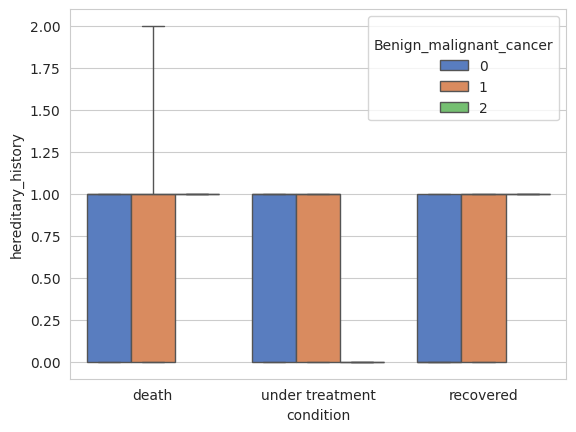

In [33]:
## plotting the box plot of condition and hereditary history of benign cancer and malignant cancer

sns.set_style("whitegrid")
sns.boxplot(x = 'condition', y = 'hereditary_history', hue = '\nBenign_malignant_cancer', palette='muted', data = breast_cancer_assessment)
sns.set(rc={'figure.figsize':(10,10)})

##### INTERPRETATION: People who have died had hereditary history and the history was similar for benign and malignant cancer.

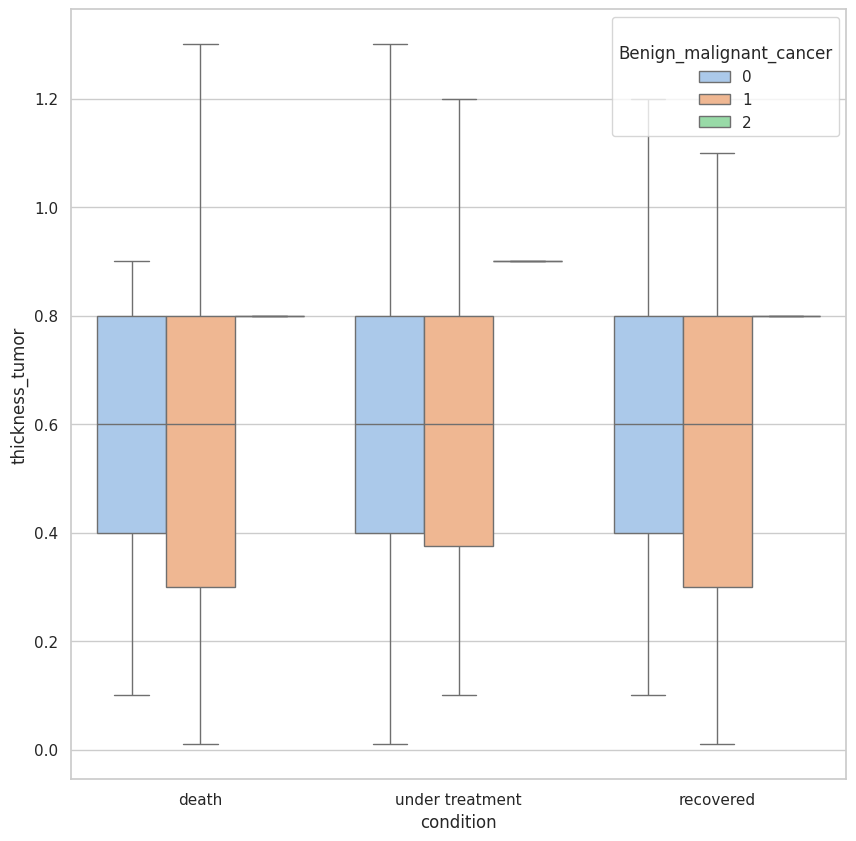

In [34]:
## Plotting boxplot condition and thickness_tumor of benign cancer and malignant cancer

sns.set_style("whitegrid")
sns.boxplot(x = 'condition', y = 'thickness_tumor', hue = '\nBenign_malignant_cancer', palette='pastel', data = breast_cancer_assessment)
sns.set(rc={'figure.figsize':(10,10)})

##### INTERPRETATION: The median of all the conditions are same for thickness_tumor

<ipython-input-35-d47d44b1a765>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="birth_date",


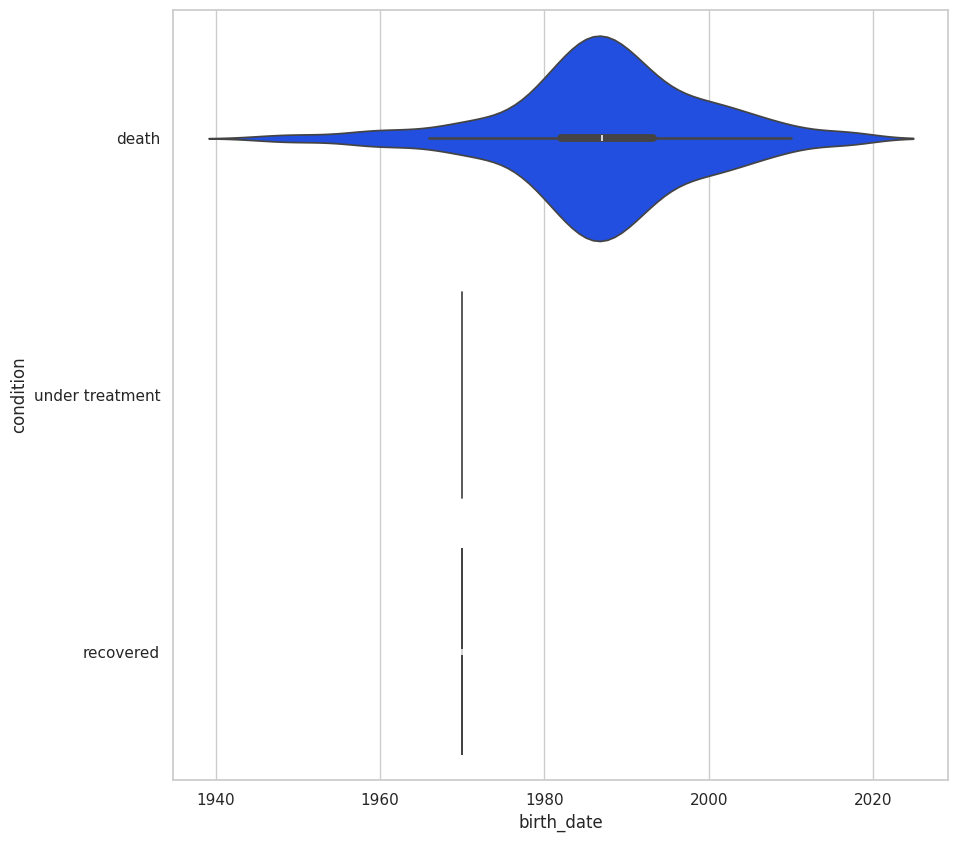

In [35]:
## plotting the violin plot for date of birth and condition

sns.set_style("whitegrid")
sns.violinplot(x="birth_date",
                y="condition",
                data=cancer, palette='bright')
sns.set(rc={'figure.figsize':(10,20)})

<ipython-input-36-e1da35d94452>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="marital_length",


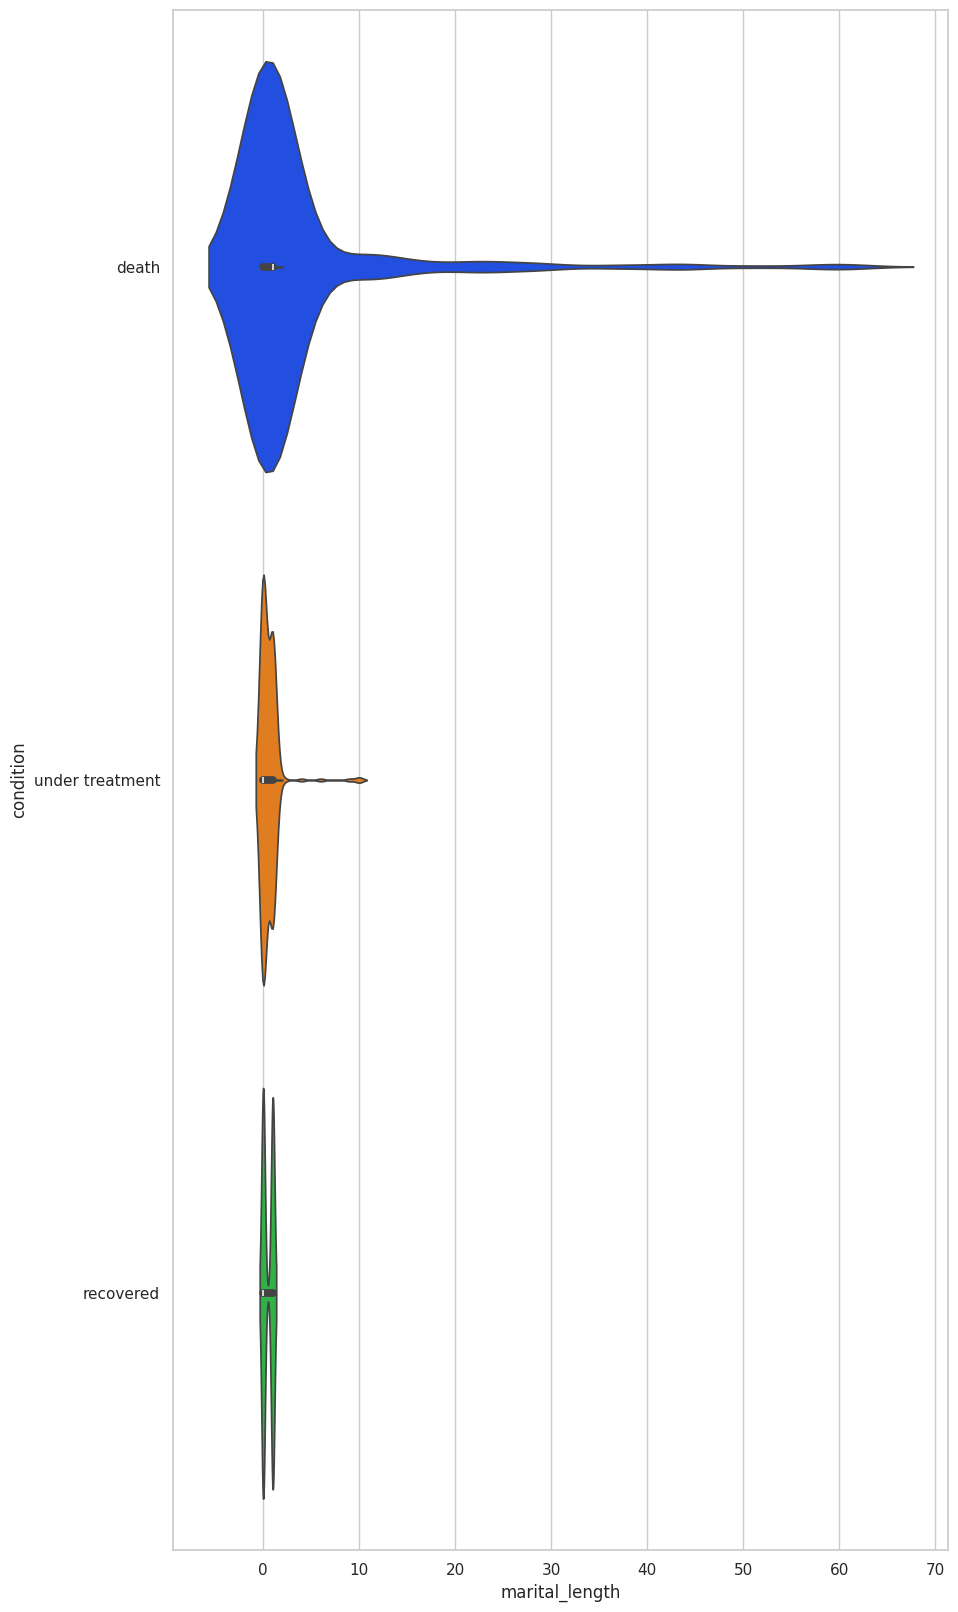

In [36]:
## plotting the violin plot for marital length and condition

sns.set_style("whitegrid")
sns.violinplot(x="marital_length",
                y="condition",
                data=cancer, palette='bright')
sns.set(rc={'figure.figsize':(5,5)})

In [37]:
## finding the int type columns

cancer.select_dtypes(include=["int", "float64"]).columns

Index(['patient_id', 'gender ', 'education', 'treatment_data',
       'id_healthcenter', 'id_treatment_region', 'hereditary_history',
       'birth_date', 'age', 'weight', 'thickness_tumor', 'marital_status',
       'marital_length', 'pregnency_experience', 'giving_birth',
       'age_pregnancy', '\nabortion', 'blood', 'taking_heartMedicine',
       'taking_blood_pressure_medicine', 'taking_gallbladder_disease_medicine',
       'smoking', 'alcohol', 'breast_pain', 'radiation_history',
       'Birth_control(Contraception)', '\nmenstrual_age', '\nmenopausal_age',
       '\nBenign_malignant_cancer'],
      dtype='object')

In [38]:
## finding the categorical type columns

cancer.select_dtypes(include = ["object"]).columns

Index(['file', 'condition'], dtype='object')

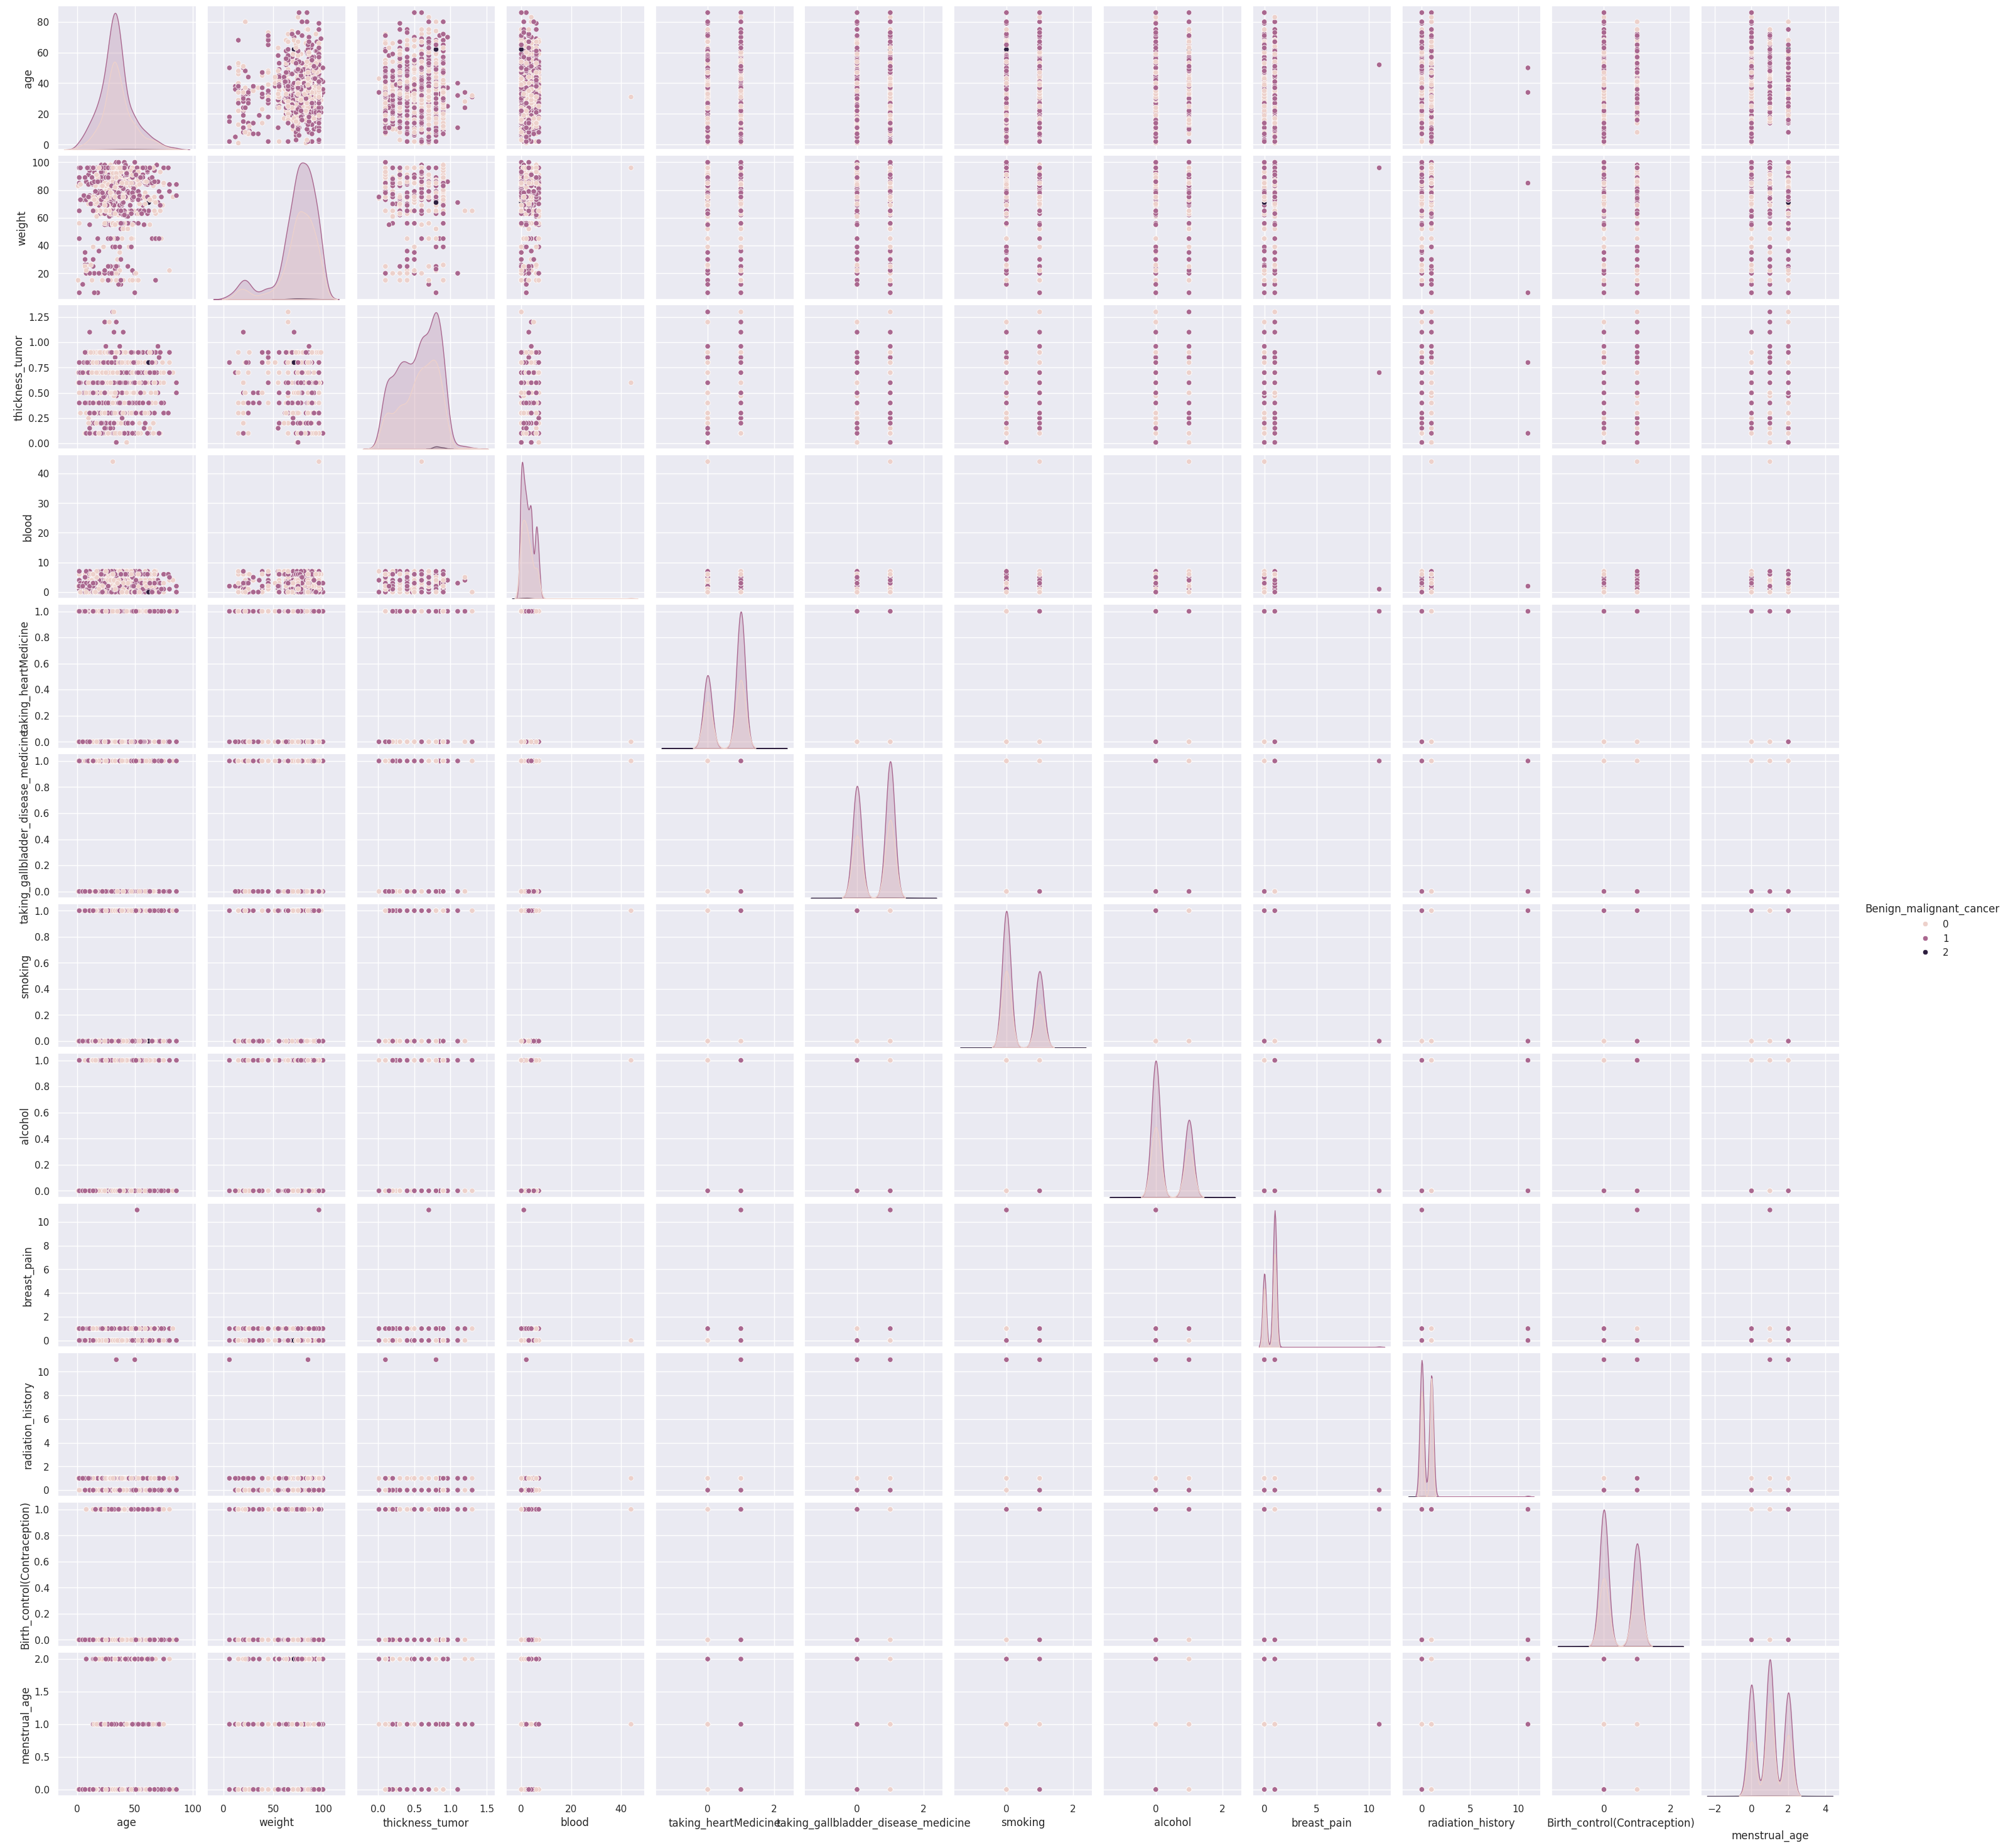

In [39]:
## Plotting the pair plot for 'age','weight', 'thickness_tumor','blood', 'taking_heartMedicine', 'taking_gallbladder_disease_medicine','smoking', 'alcohol','breast_pain',
## 'radiation_history', 'Birth_control(Contraception)','\nmenstrual_age' with differentiation of benign or malignant cancer.

sns.pairplot(breast_cancer_assessment, hue='\nBenign_malignant_cancer', vars=['age','weight', 'thickness_tumor','blood', 'taking_heartMedicine',
                                                                              'taking_gallbladder_disease_medicine','smoking', 'alcohol','breast_pain','radiation_history',
                                                                              'Birth_control(Contraception)','\nmenstrual_age'])
plt.show()

##### INTERPRETATION: There is no perfect correlation exists. so we will plot heat map later.

In [40]:
## assigning the numerical data to a variable

df_num = cancer[['gender ', 'education',
       'hereditary_history','birth_date', 'age', 'weight', 'thickness_tumor', 'marital_status',
       'marital_length', 'pregnency_experience', 'giving_birth',
       'age_pregnancy', '\nabortion', 'blood', 'taking_heartMedicine',
       'taking_blood_pressure_medicine', 'taking_gallbladder_disease_medicine',
       'smoking', 'alcohol', 'breast_pain', 'radiation_history',
       'Birth_control(Contraception)', '\nmenstrual_age', '\nmenopausal_age',
       '\nBenign_malignant_cancer']]

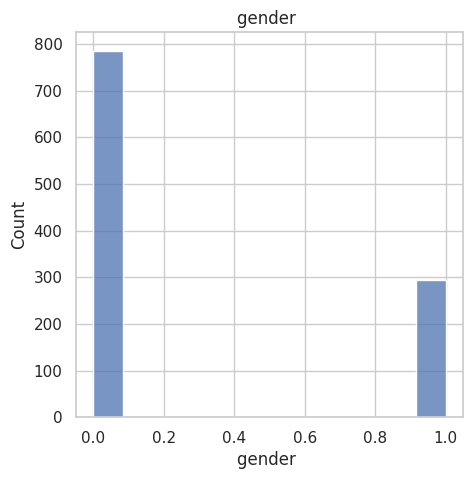

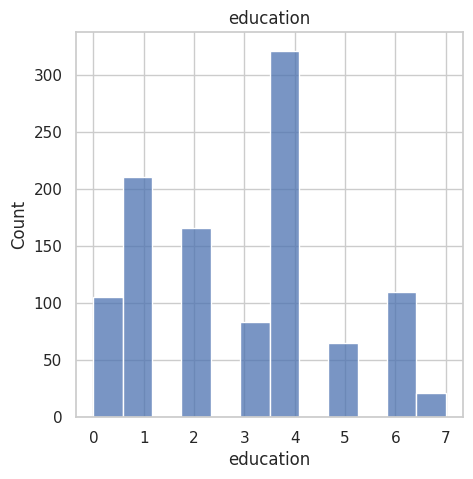

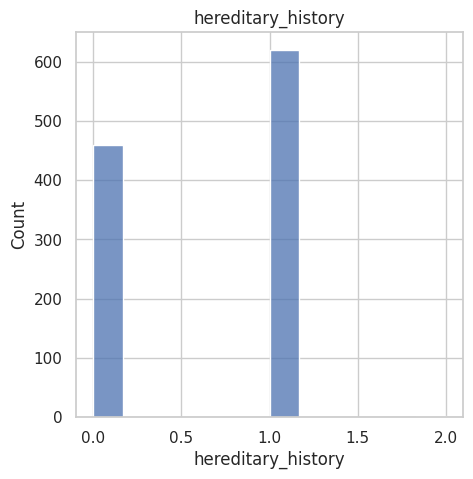

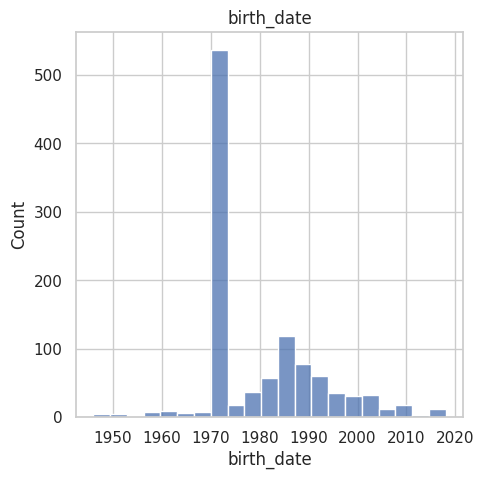

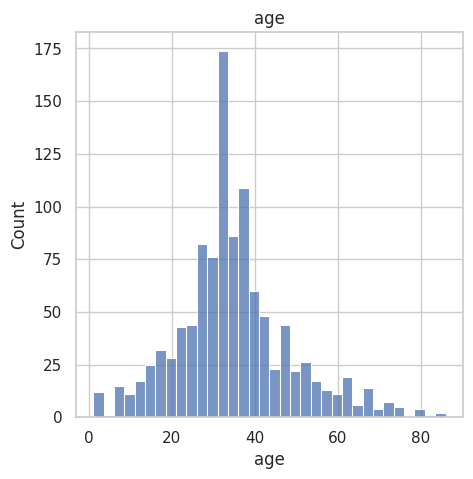

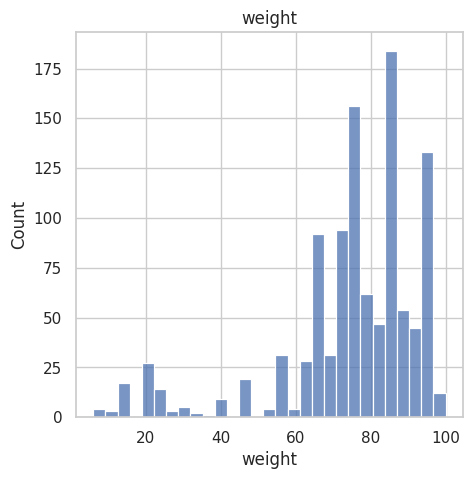

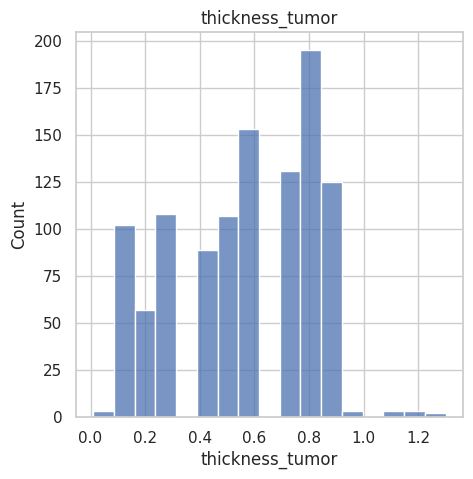

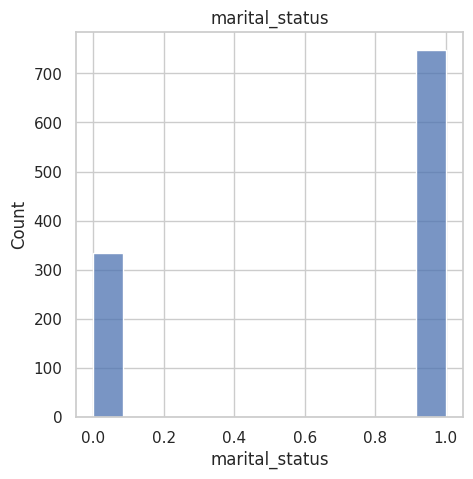

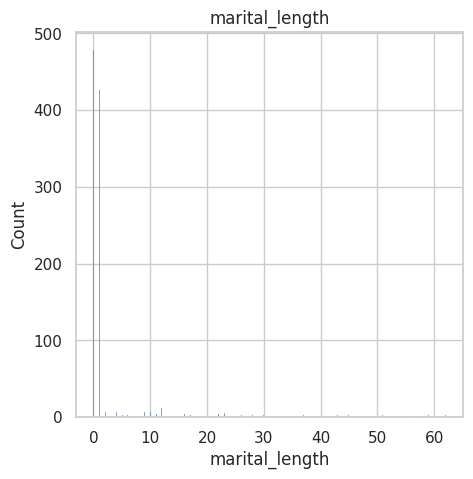

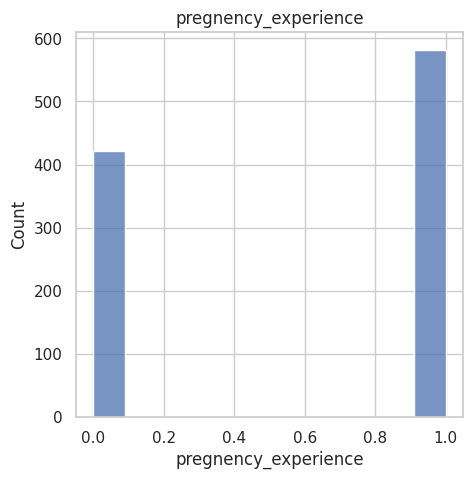

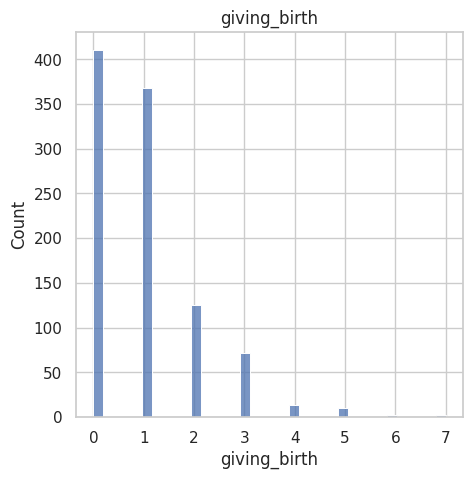

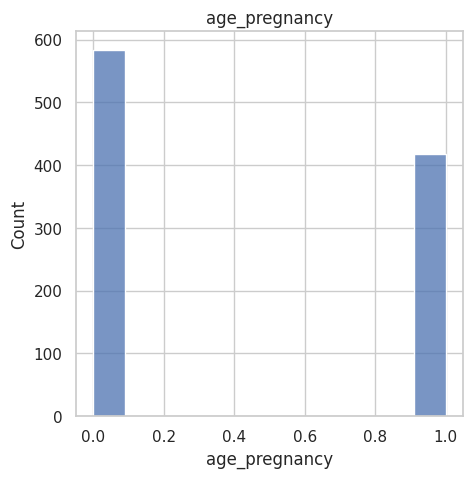

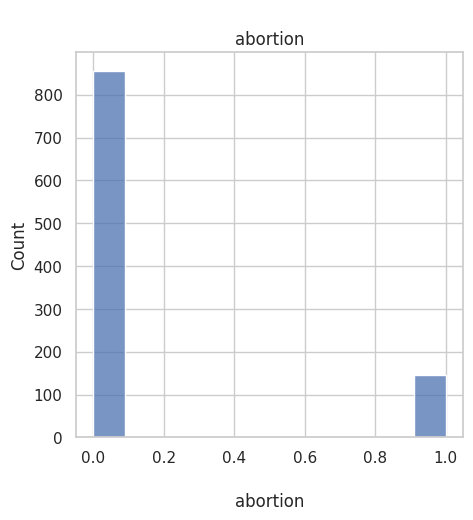

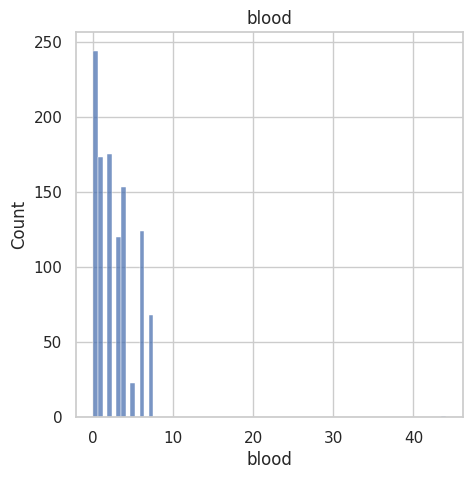

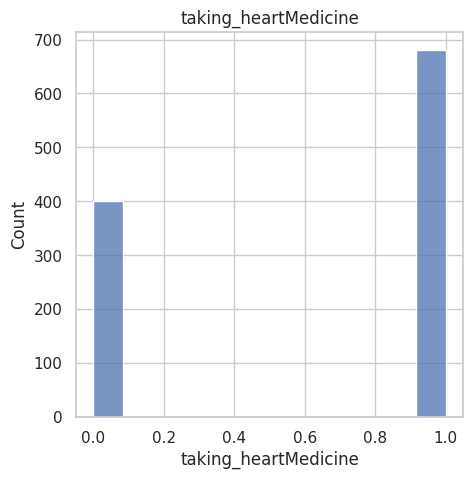

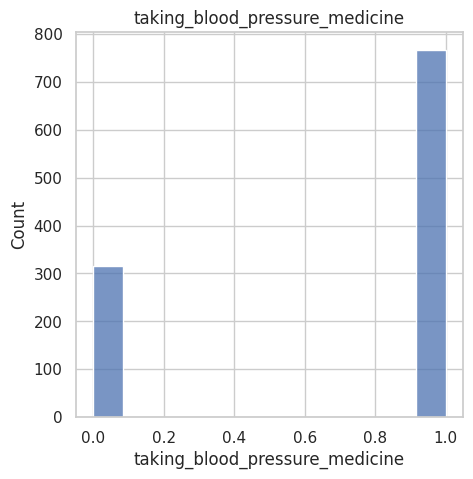

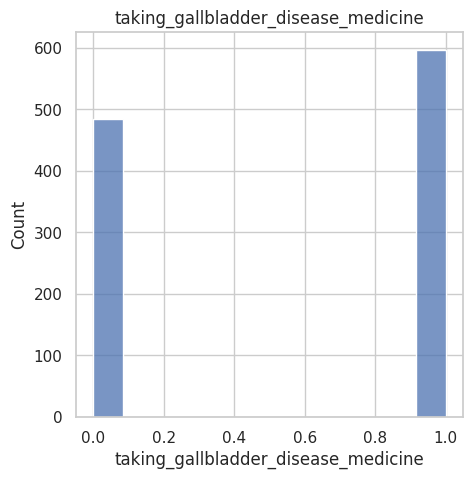

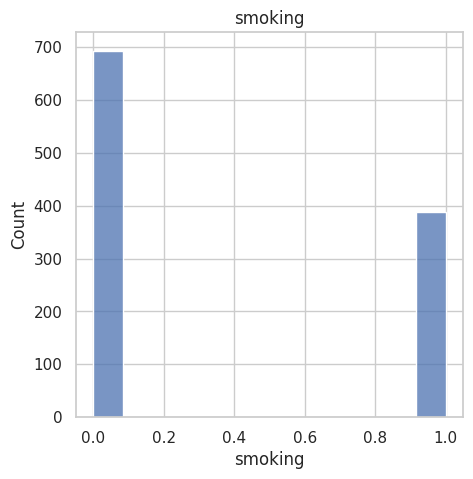

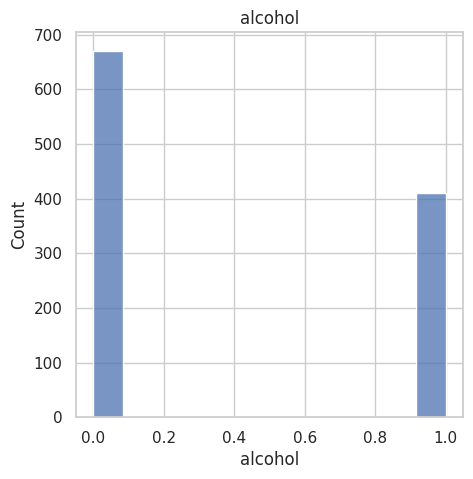

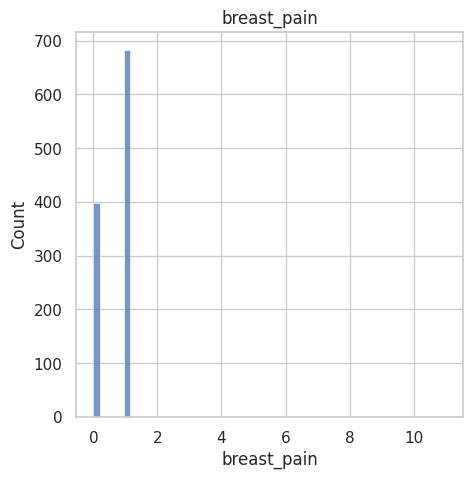

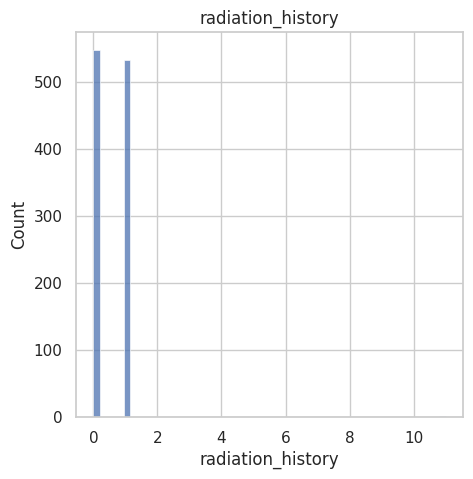

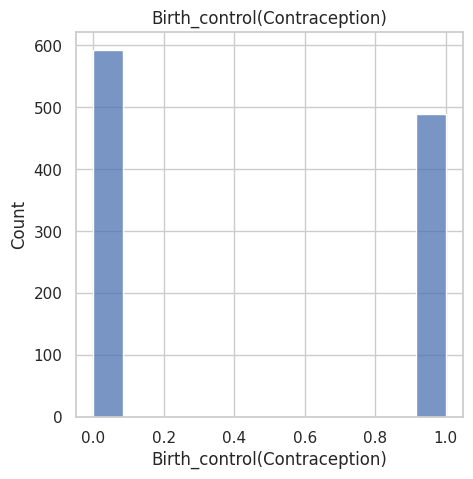

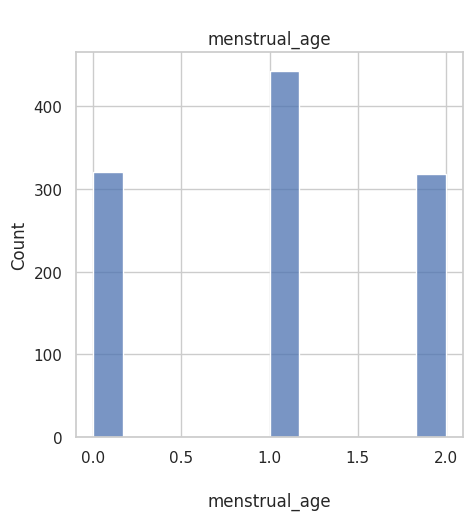

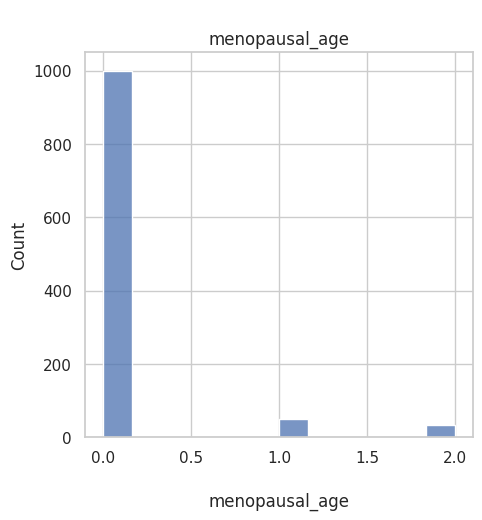

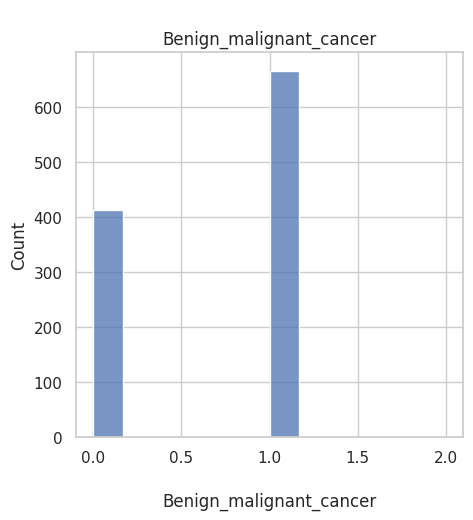

In [41]:
## plotting histograms for all the numerical variables to know the count

for i in df_num.columns:
    sns.set_style("whitegrid")
    sns.histplot(df_num[i])
    sns.color_palette("Spectral")
    plt.title(i)
    sns.set(rc={'figure.figsize':(5,5)})
    plt.show()

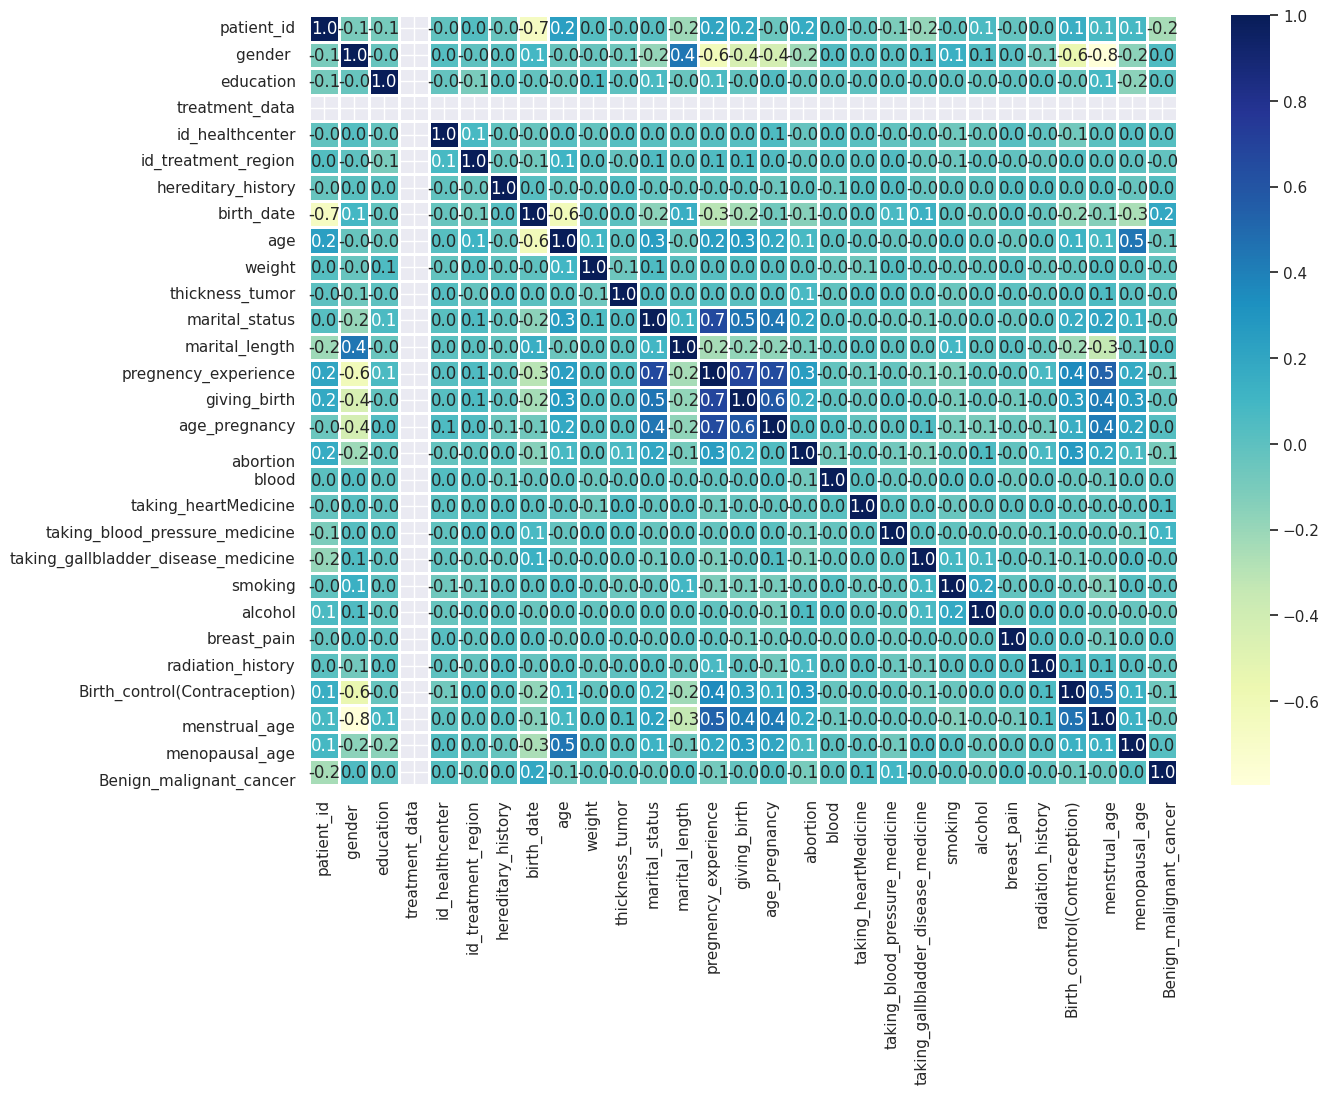

In [43]:
## Plotting heatmap to know the correlation between variables


plt.figure(figsize=(14,10))
numerical_cancer = cancer.select_dtypes(include=np.number)
sns.heatmap(numerical_cancer.corr(),annot=True,cmap="YlGnBu",fmt='.1f',linewidths=2)
plt.show()

##### INTERPRETATION: Though there are no perfect correlations, There are some partial correlations of some variables.

## PART 2

### Calculating Risk of Cancer

##### In this section, a calculator is built by giving dummy scores to the important risk factors namely, hereditary_history, age, age_pregnancy, smoking, alcohol, radiation_history, menstural_age, menopausal_age making a total of score 10 and running it on a population . The scoring is as follows:
##### i) if age >= 60 -> score = 1 and 0 otherwise.
##### ii) if hereditary_history is 'yes' i.e., 1 -> score = 1, else 0
##### iii) if age at pregnancy is 'less than 35 years' i.e., 1 -> score = 1, else 0
##### iv) if smoking is 'yes' i.e., 1 -> score = 1, else 0
##### v) if taking alcohol is 'yes' i.e., 1 -> score = 1, else 0
##### vi) if radiation_history is 'yes' i.e., 1 -> score = 1, else 0
##### i) if menstural_age >= 12 -> score = 1, if menstural_age < 12 -> score = 2 and 0 otherwise.
##### i) if menopausal_age >= 50 -> score = 2, if menopausal_age < 50 -> score = 1 and 0 otherwise.

### a) Building a Risk Calculator

In [44]:
## renaming the coloumns for convenience

cancer.rename(columns = {'\nmenstrual_age':'menstural_age'}, inplace = True)
cancer.rename(columns = {'\nmenopausal_age':'menopausal_age'}, inplace = True)

In [45]:
## creating the calculator

def risk_calculator(hereditary_history, age, age_pregnancy, smoking, alcohol, radiation_history, menstural_age, menopausal_age):
    """(int, int, int, int, int, int, int, int) -> (int)
    This function takes the shereditary_history, age, age_pregnancy, smoking, alcohol, radiation_history, menstural_age, menopausal_age
    as parameters and returns the risk_score.

    >>> risk_calculator(0, 60, 1,0, 1, 1, 2, 1.0)
    5

    >>> risk_calculator(1, 30, 1,0, 1, 1, 2, 2.0)
    6

    >>> risk_calculator(1, 30, 1,0, 1, 0, 1, 2.0)
    6
    """

    ## assigning the initial score to 0

    risk_score = 0

    ## calculating the score of age

    if age >= 60:
        risk_score += 1
    else:
        risk_score += 0

    ## calculating the score of hereditary_history

    if hereditary_history == 1:
        risk_score += 1
    else:
        risk_score += 0

    ## calculating the score of age_pregnancy

    if age_pregnancy == 1:
        risk_score += 1
    else:
        risk_score += 0

    ## calculating the score of smoking

    if smoking == 1:
        risk_score += 1
    else:
        risk_score+= 0

    ## calculating the score of alcohol

    if alcohol == 1:
        risk_score += 1
    else:
        risk_score += 0

    ## calculating the score of radiation_history

    if radiation_history == 1:
        risk_score += 1
    else:
        risk_score += 0

    ## calculating the score of menstural_ageage

    if menstural_age == 1:
        risk_score += 2
    elif menstural_age == 2:
        risk_score +=1
    else:
        risk_score += 0

    ## calculating the score of menopausal_age

    if menopausal_age == 2.0:
        risk_score +=1
    elif menopausal_age == 1.0:
        risk_score +=0
    else:
        risk_score += 0

    return risk_score

In [46]:
import doctest
doctest.run_docstring_examples(risk_calculator, globals(), verbose=True)


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.10/doctest.py", line 1501, in run
    sys.settrace(save_trace)



Finding tests in NoName
Trying:
    risk_calculator(0, 60, 1,0, 1, 1, 2, 1.0)
Expecting:
    5
ok
Trying:
    risk_calculator(1, 30, 1,0, 1, 1, 2, 2.0)
Expecting:
    6
ok
Trying:
    risk_calculator(1, 30, 1,0, 1, 0, 1, 2.0)
Expecting:
    6
ok


### b) Running the Risk Calculator on a Population

In [47]:
## creating a subset of cancer data above with hereditary_history, age, age_pregnancy, smoking, alcohol, radiation_history, menstural_age, menopausal_age

sql = """
select hereditary_history, age, age_pregnancy, smoking, alcohol, radiation_history, menstural_age, menopausal_age
from cancer
"""

In [48]:
sql = ps.sqldf(sql, locals())

In [49]:
sql.head()

,hereditary_history,age,age_pregnancy,smoking,alcohol,radiation_history,menstural_age,menopausal_age
0,1,30,0.0,0,0,1,1,0.0
1,0,30,0.0,0,1,0,2,0.0
2,0,30,0.0,0,0,1,1,0.0
3,1,30,1.0,1,0,0,2,0.0
4,0,10,0.0,0,0,0,0,0.0


In [50]:
## running the risk calculator on dataframe

def cancer_risk(table):
    """(table) -> (dataframe)
    This function takes the path of the file and returns the with the parameters namely hereditary_history, age, age_pregnancy, smoking, alcohol, radiation_history,
    menstural_age, menopausal_age and risk.

    """
    table = sql

    ## creating empty list

    risk_list = []

    for i in range(len(table)):

    ## running the calculator on the dataframe

        cancer_risk = risk_calculator(table.loc[i, "hereditary_history"], table.loc[i, "age"], table.loc[i, 'age_pregnancy'], table.loc[i, "smoking"],
                                      table.loc[i, "alcohol"], table.loc[i, "radiation_history"], table.loc[i, "menstural_age"], table.loc[i, "menopausal_age"] )
        risk_list.append(cancer_risk)
    risk = pd.DataFrame({"risk_score":risk_list}, columns = ['risk_score'])
    risk_data = pd.concat([table, risk], axis = 1)

    return risk_data

In [51]:
cancer_risk(sql).head()

,hereditary_history,age,age_pregnancy,smoking,alcohol,radiation_history,menstural_age,menopausal_age,risk_score
0,1,30,0.0,0,0,1,1,0.0,4
1,0,30,0.0,0,1,0,2,0.0,2
2,0,30,0.0,0,0,1,1,0.0,3
3,1,30,1.0,1,0,0,2,0.0,4
4,0,10,0.0,0,0,0,0,0.0,0


## PART 3

### Calculating Stage of Cancer

##### In this part, the cancer stage is calculated. First the table is extracted from the web page and converted into json. Then the stage is calculated using the AJCC staging system.

##### he AJCC staging system was mainly based on anatomical staging, which used the extent of the primary tumor (T), status of the regional lymph nodes (N), and metastasis status (M). This has remained largely unchanged in the 8th edition. The T stage is based on the size and degree of loco-regional invasion by the primary tumor and is categorized from T1 to T4. The N stage is determined by the extent of nodal involvement including axillary, internal mammary, and ipsilateral supraclavicular lymph nodes. Distant metastases are evaluated to determine the M stage.
##### The stages used in this part are 0, IA, IB, IIA, IIB, IIIA, IIIB, IIIC, and IV and their parameters are described below:
##### i)  T0 and T1 tumors with nodal micrometastases (N1mi) are staged as Stage IB.
##### ii) T2, T3, and T4 tumors with nodal micrometastases (N1mi) are staged using the N1 category.
##### iii)M0 includes M0(i+)
##### iv) The designation pM0 is not valid; any M0 is clinical.
##### v)  If a patient presents with M1 disease prior to neoadjuvant systemic therapy, the stage is considered stage IV and remains stage IV regardless of response to neoadjuvant therapy.

##### The wesite used for this is: https://emedicine.medscape.com/article/1947145-workup#c13

In [54]:
## reading the table from the web page

import pandas as pd
import urllib.request

user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36"

req = urllib.request.Request(
    'https://emedicine.medscape.com/article/1947145-workup#c13',
    headers={'User-Agent': user_agent}
)

with urllib.request.urlopen(req) as response:
    html = response.read()

dfs = pd.read_html(html)
TNM_staging = dfs[5].fillna(method = 'ffill')


## the NA's are filled with the previous values

TNM_staging = dfs[5].fillna(method = 'ffill')

## seperating the header rows from the table

header = TNM_staging.iloc[0]

## seperating the remaining values

TNM = TNM_staging[1:]

## combining both

TNM.columns = header

<ipython-input-54-7f8921345495>:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  TNM_staging = dfs[5].fillna(method = 'ffill')
<ipython-input-54-7f8921345495>:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  TNM_staging = dfs[5].fillna(method = 'ffill')


In [55]:
TNM

,Stage,T,N,M
1,0,Tis,N0,M0
2,IA,T1,N0,M0
3,IB,T0,N1mi,M0
4,IB,T1,N1mi,M0
5,IIA,T0,N1,M0
6,IIA,T1,N1,M0
7,IIA,T2,N0,M0
8,IIB,T2,N1,M0
9,IIB,T3,N0,M0
10,IIIA,T0,N2,M0


In [56]:
## elaborating the Any T and Any N values


TNM.loc[20] = ['IIIC', 'T1', 'N3', 'M0']
TNM.loc[21] = ['IIIC', 'T2', 'N3', 'M0']
TNM.loc[22] = ['IIIC', 'T3', 'N3', 'M0']
TNM.loc[23] = ['IIIC', 'T4', 'N3', 'M0']
TNM.loc[24] = ['IV', 'T1', 'N1', 'M1']
TNM.loc[25] = ['IV', 'T2', 'N1', 'M1']
TNM.loc[26] = ['IV', 'T3', 'N1', 'M1']
TNM.loc[27] = ['IV', 'T4', 'N1', 'M1']
TNM.loc[28] = ['IV', 'T1', 'N2', 'M1']
TNM.loc[29] = ['IV', 'T2', 'N2', 'M1']
TNM.loc[30] = ['IV', 'T3', 'N2', 'M1']
TNM.loc[31] = ['IV', 'T4', 'N2', 'M1']
TNM.loc[32] = ['IV', 'T1', 'N3', 'M1']
TNM.loc[33] = ['IV', 'T2', 'N3', 'M1']
TNM.loc[34] = ['IV', 'T3', 'N3', 'M1']
TNM.loc[35] = ['IV', 'T4', 'N3', 'M1']


In [57]:
## dropping the rows containing Any T and Any N

TNM.drop([18, 19], inplace = True)

In [58]:
TNM

,Stage,T,N,M
1,0,Tis,N0,M0
2,IA,T1,N0,M0
3,IB,T0,N1mi,M0
4,IB,T1,N1mi,M0
5,IIA,T0,N1,M0
6,IIA,T1,N1,M0
7,IIA,T2,N0,M0
8,IIB,T2,N1,M0
9,IIB,T3,N0,M0
10,IIIA,T0,N2,M0


In [60]:
## converting the table to json

TNM_data = TNM.to_json(orient = 'records')

In [61]:
## converting string json to list

res = ast.literal_eval(TNM_data)
res

[{'Stage': '0', 'T': 'Tis', 'N': 'N0', 'M': 'M0'},
 {'Stage': 'IA', 'T': 'T1', 'N': 'N0', 'M': 'M0'},
 {'Stage': 'IB', 'T': 'T0', 'N': 'N1mi', 'M': 'M0'},
 {'Stage': 'IB', 'T': 'T1', 'N': 'N1mi', 'M': 'M0'},
 {'Stage': 'IIA', 'T': 'T0', 'N': 'N1', 'M': 'M0'},
 {'Stage': 'IIA', 'T': 'T1', 'N': 'N1', 'M': 'M0'},
 {'Stage': 'IIA', 'T': 'T2', 'N': 'N0', 'M': 'M0'},
 {'Stage': 'IIB', 'T': 'T2', 'N': 'N1', 'M': 'M0'},
 {'Stage': 'IIB', 'T': 'T3', 'N': 'N0', 'M': 'M0'},
 {'Stage': 'IIIA', 'T': 'T0', 'N': 'N2', 'M': 'M0'},
 {'Stage': 'IIIA', 'T': 'T1', 'N': 'N2', 'M': 'M0'},
 {'Stage': 'IIIA', 'T': 'T2', 'N': 'N2', 'M': 'M0'},
 {'Stage': 'IIIA', 'T': 'T3', 'N': 'N1', 'M': 'M0'},
 {'Stage': 'IIIA', 'T': 'T3', 'N': 'N2', 'M': 'M0'},
 {'Stage': 'IIIB', 'T': 'T4', 'N': 'N0', 'M': 'M0'},
 {'Stage': 'IIIB', 'T': 'T4', 'N': 'N1', 'M': 'M0'},
 {'Stage': 'IIIB', 'T': 'T4', 'N': 'N2', 'M': 'M0'},
 {'Stage': 'IIIC', 'T': 'T1', 'N': 'N3', 'M': 'M0'},
 {'Stage': 'IIIC', 'T': 'T2', 'N': 'N3', 'M': 'M0'},
 {

In [62]:
## creating a json file

with open("res.json", "w") as outfile:
    json.dump(res, outfile)

In [63]:
## calculating the TNM Stage

def TNM_stage(tumor, node, metastasis):
    """(str, str, str') -> (str)
    This function takes the tumor, node, metastasis as parameters and returns the TNM stage.

    >>> TNM_stage('T0', 'N1', 'M0')
    'IIA'

    >>> TNM_stage('T1', 'N2', 'M0')
    'IIIA'

    >>> TNM_stage('T3', 'N2', 'M0')
    'IIIA'
    """

    with open(r"res.json") as af:
        obj = json.load(af)

    for a in obj:
        if a['T'] == tumor and a['N']== node and a['M']== metastasis:
            stage = (a['Stage'])
            return stage


In [64]:
import doctest
doctest.run_docstring_examples(TNM_stage, globals(), verbose=True)

Finding tests in NoName
Trying:
    TNM_stage('T0', 'N1', 'M0')
Expecting:
    'IIA'
ok
Trying:
    TNM_stage('T1', 'N2', 'M0')
Expecting:
    'IIIA'
ok
Trying:
    TNM_stage('T3', 'N2', 'M0')
Expecting:
    'IIIA'
ok


## PART 4

### Suggestion of Drugs
##### In this part the drugs are suggested using a json file created manually containing the stage, er status, pr status, her2 status, drugs, chemotherapy, and drugs for residual cancer. The information of drugs are taken from the National Cancer Institute web site.
##### The link is: https://www.cancer.gov/types/breast/patient/breast-treatment-pdq#_662

In [65]:
## the drugs are suggested using json file

def cancer_drug(stage, er_status, pr_status, her2_status):
    """(str, str, str','str') -> (str)
    This function takes the stage, er_status, pr_status, her2_status as parameters and returns the drugs

    >>> cancer_drug('IIA', 'Negative', 'Negative', 'Positive')
    'trastuzumab (with or without pertuzumab)'

    >>> cancer_drug('IV', 'Negative', 'Negative', 'Negative')
    'olaparib or talazoparib with BRCA mutation, pembrolizumab for microsatellite instability (MSI) or changes in any of the mismatch repair (MMR) genes, acituzumab govitecan (Trodelvy) without any specific gene or protein changes'

    >>> cancer_drug('IV', 'Positive', 'Positive', 'Negative')
    'amoxifen or an aromatase inhibitor,  CDK4/6 inhibitor, everolimus, or a PI3K inhibitor'
    """

    with open(r"cancer_drugs.json") as f:
        obj = json.load(f)
    for i in obj:
        if i['STAGE'] == stage and i['ER']== er_status and i['PR']== pr_status and i['HER2']== her2_status :
            drug = (i['TREATMENT']['DRUG'])
            return drug

In [66]:
import doctest
doctest.run_docstring_examples(cancer_drug, globals(), verbose=True)

Finding tests in NoName
Trying:
    cancer_drug('IIA', 'Negative', 'Negative', 'Positive')
Expecting:
    'trastuzumab (with or without pertuzumab)'
ok
Trying:
    cancer_drug('IV', 'Negative', 'Negative', 'Negative')
Expecting:
    'olaparib or talazoparib with BRCA mutation, pembrolizumab for microsatellite instability (MSI) or changes in any of the mismatch repair (MMR) genes, acituzumab govitecan (Trodelvy) without any specific gene or protein changes'
ok
Trying:
    cancer_drug('IV', 'Positive', 'Positive', 'Negative')
Expecting:
    'amoxifen or an aromatase inhibitor,  CDK4/6 inhibitor, everolimus, or a PI3K inhibitor'
ok


## PART 5

### chemotherapy requirement

##### In this part the chemotherapy requirement is suggested using a json file created manually containing the stage, er status, pr status, her2 status, drugs, chemotherapy, and drugs for residual cancer. The information of drugs are taken from the National Cancer Institute web site.
##### The link is: https://www.cancer.gov/types/breast/patient/breast-treatment-pdq#_662

In [67]:
## chemotherapy requirement is suggested using the function

def cancer_chemotherapy(stage, er_status, pr_status, her2_status):
    """(str, str, str','str') -> (str)
    This function takes the stage, er_status, pr_status, her2_status as parameters and returns the chemotherapy

    >>> cancer_chemotherapy('IIA', 'Negative', 'Negative', 'Positive')
    'neoadjuvant (before surgery) chemotherapy'

    >>> cancer_chemotherapy('IIIA', 'Negative', 'Negative', 'Positive')
    'neoadjuvant (before surgery)'

    >>> cancer_chemotherapy('IV', 'Positive', 'Positive', 'Negative')
    'neoadjuvant (before surgery)'
    """
    with open(r"cancer_drugs.json") as f:
        obj = json.load(f)
    for i in obj:
        if i['STAGE'] == stage and i['ER']== er_status and i['PR']== pr_status and i['HER2']== her2_status :
            chemotherapy = (i['TREATMENT']['CHEMOTHERAPY'])
            return chemotherapy

In [68]:
import doctest
doctest.run_docstring_examples(cancer_chemotherapy, globals(), verbose=True)

Finding tests in NoName
Trying:
    cancer_chemotherapy('IIA', 'Negative', 'Negative', 'Positive')
Expecting:
    'neoadjuvant (before surgery) chemotherapy'
ok
Trying:
    cancer_chemotherapy('IIIA', 'Negative', 'Negative', 'Positive')
Expecting:
    'neoadjuvant (before surgery)'
ok
Trying:
    cancer_chemotherapy('IV', 'Positive', 'Positive', 'Negative')
Expecting:
    'neoadjuvant (before surgery)'
ok


## PART 6

### Drugs in Residual Cancer

##### In this part the drugs are suggested for residual cancer using a json file created manually containing the stage, er status, pr status, her2 status, drugs, chemotherapy, and drugs for residual cancer. The information of drugs are taken from the National Cancer Institute web site.
##### The link is: https://www.cancer.gov/types/breast/patient/breast-treatment-pdq#_662¶

In [69]:
def residual_cancer_drugs(stage, er_status, pr_status, her2_status):
    """(str, str, str','str') -> (str)
    This function takes the stage, er_status, pr_status, her2_status as parameters and returns the drugs for residual cancer

    >>> residual_cancer_drugs('IIA', 'Negative', 'Negative', 'Positive')
    'None'

    >>> residual_cancer_drugs('IV', 'Negative', 'Negative', 'Negative')
    'None'

    >>> residual_cancer_drugs('IA', 'Positive', 'Positive', 'Negative')
    'ado-trastuzumab emtansine'
    """
    with open(r"cancer_drugs.json") as f:
        obj = json.load(f)
    for i in obj:
        if i['STAGE'] == stage and i['ER']== er_status and i['PR']== pr_status and i['HER2']== her2_status :
            residual_drugs = (i['TREATMENT']['RESIDUAL CANCER AFTER SURGERY DRUGS'])
            return residual_drugs

In [70]:
import doctest
doctest.run_docstring_examples(residual_cancer_drugs, globals(), verbose=True)

Finding tests in NoName
Trying:
    residual_cancer_drugs('IIA', 'Negative', 'Negative', 'Positive')
Expecting:
    'None'
ok
Trying:
    residual_cancer_drugs('IV', 'Negative', 'Negative', 'Negative')
Expecting:
    'None'
ok
Trying:
    residual_cancer_drugs('IA', 'Positive', 'Positive', 'Negative')
Expecting:
    'ado-trastuzumab emtansine'
ok


## PART 7

### Run the Calculator on the Population

##### In this Part the two csv files are merged, then a subset is made and then the calculator of drugs, chemotherapy, and drugs for residual cancer were run for the population.
##### This dataset consists of a group of breast cancer patients, who had surgery to remove their tumour

##### The data is taken from the Kaggle and the link is: https://www.kaggle.com/datasets/amandam1/breastcancerdataset

In [71]:
## reading the csv files

FILE = pd.read_csv('BRCA.csv')
file = pd.read_csv('clinical_data_breast_cancer.csv')

In [72]:
## switching the case of columns to lower for both the files

FILE.columns = FILE.columns.str.lower()
file.columns = file.columns.str.lower()

In [73]:
## renaming certain columns for convenience

file.rename(columns = {'her2 final status':'her2_status','er status': 'er_status', 'pr status': 'pr_status', 'ajcc stage': 'stage'}, inplace = True)
FILE.rename(columns = {'her2 status':'her2_status'}, inplace = True)

In [74]:
## filtering out unique columns and making a subset of the data frame FILE

different_cols = FILE.columns.difference(file.columns)
files = FILE[different_cols]

In [75]:
## merging both the files on patient_id

files_all = file.merge(files, copy = True, left_on = 'complete tcga id', right_on = 'patient_id',  how = 'inner')

In [76]:
files_all.head()

,complete tcga id,gender,age at initial pathologic diagnosis,er_status,pr_status,her2_status,tumor,tumor--t1 coded,node,node-coded,...,histology,patient_id,patient_status,pr status,protein1,protein2,protein3,protein4,surgery_type,tumour_stage
0,TCGA-BH-A18N,FEMALE,88,Positive,Positive,Negative,T2,T_Other,N1,Positive,...,Infiltrating Ductal Carcinoma,TCGA-BH-A18N,Dead,Positive,-0.603350,1.38250,0.403570,0.26921,Modified Radical Mastectomy,II
1,TCGA-A2-A0YI,FEMALE,62,Positive,Positive,Negative,T1,T1,N0,Negative,...,Mucinous Carcinoma,TCGA-A2-A0YI,Alive,Positive,0.066312,1.29540,0.251210,-0.31091,Lumpectomy,I
2,TCGA-A2-A0YL,FEMALE,48,Positive,Positive,Negative,T3,T_Other,N2,Positive,...,Infiltrating Ductal Carcinoma,TCGA-A2-A0YL,Dead,Positive,-0.215800,-0.29338,0.867710,-0.24204,Simple Mastectomy,III
3,TCGA-A2-A0T6,FEMALE,50,Positive,Positive,Negative,T3,T_Other,N0,Negative,...,Infiltrating Ductal Carcinoma,TCGA-A2-A0T6,Alive,Positive,-0.325600,1.98990,-0.038147,0.25251,Simple Mastectomy,II
4,TCGA-A2-A0T7,FEMALE,51,Positive,Positive,Negative,T2,T_Other,N0,Negative,...,Infiltrating Ductal Carcinoma,TCGA-A2-A0T7,Alive,Positive,-0.384660,0.80609,-1.627400,-0.51291,Modified Radical Mastectomy,II


In [79]:
files_all.columns

Index(['complete tcga id', 'gender', 'age at initial pathologic diagnosis',
       'er_status', 'pr_status', 'her2_status', 'tumor', 'tumor--t1 coded',
       'node', 'node-coded', 'metastasis', 'metastasis-coded', 'stage',
       'converted stage', 'survival data form', 'vital status',
       'days to date of last contact', 'days to date of death', 'os event',
       'os time', 'pam50 mrna', 'sigclust unsupervised mrna',
       'sigclust intrinsic mrna', 'mirna clusters', 'methylation clusters',
       'rppa clusters', 'cn clusters', 'integrated clusters (with pam50)',
       'integrated clusters (no exp)', 'integrated clusters (unsup exp)',
       'age', 'date_of_last_visit', 'date_of_surgery', 'er status',
       'histology', 'patient_id', 'patient_status', 'pr status', 'protein1',
       'protein2', 'protein3', 'protein4', 'surgery_type', 'tumour_stage'],
      dtype='object')

In [78]:
## making the subset of the data frame

population_sql = """
select tumor, node, metastasis, er_status, pr_status, her2_status
from files_all
"""

In [80]:
population = ps.sqldf(population_sql, locals())

In [81]:
population.head()

,tumor,node,metastasis,er_status,pr_status,her2_status
0,T2,N1,M0,Positive,Positive,Negative
1,T1,N0,M0,Positive,Positive,Negative
2,T3,N2,M0,Positive,Positive,Negative
3,T3,N0,M0,Positive,Positive,Negative
4,T2,N0,M0,Positive,Positive,Negative


In [82]:
def breast_cancer(file):
    """(file) -> (dataframe)
    This function takes the tumor, node, metastasis, er_status, pr_status, her2_status as parameters and returns the dataframe containing drugs, chemotherapy, and
    residual cancer drugs
    """

    file = population

    ## creating empty lists

    stage_list = []
    drug_list = []
    chemo_list = []
    residual_list = []

    ## calculating the stage

    for i in range(len(file)):
        cancer_stage = TNM_stage(file.loc[i, "tumor"], file.loc[i, "node"], file.loc[i, 'metastasis'])
        stage_list.append(cancer_stage)
    stage = pd.DataFrame({"stage":stage_list}, columns = ['stage'])
    stage_data = pd.concat([file, stage], axis = 1)

    ## suggesting the drugs

    for i in range(len(stage_data)):
        drug = cancer_drug(stage_data.loc[i, "stage"], stage_data.loc[i, "er_status"], stage_data.loc[i, 'pr_status'], stage_data.loc[i, "her2_status"])
        drug_list.append(drug)
    drugs = pd.DataFrame({"drug":drug_list}, columns = ['drug'])
    drugs_data = pd.concat([stage_data, drugs], axis = 1)

    ## suggesting the chemotherapy

    for i in range(len(stage_data)):
        chemo = cancer_chemotherapy(stage_data.loc[i, "stage"],stage_data.loc[i, "er_status"], stage_data.loc[i, 'pr_status'], stage_data.loc[i, "her2_status"])
        chemo_list.append(chemo)
    chemotherapy = pd.DataFrame({"chemotherapy":chemo_list}, columns = ['chemotherapy'])
    chemo_data = pd.concat([drugs_data, chemotherapy], axis = 1)

    ## suggesting the drugs for the residual cancer

    for i in range(len(stage_data)):
        residual = residual_cancer_drugs(stage_data.loc[i, "stage"], stage_data.loc[i, "er_status"], stage_data.loc[i, 'pr_status'], stage_data.loc[i, "her2_status"])
        residual_list.append(residual)
    residual_cancer = pd.DataFrame({"residual_cancer_drugs":residual_list}, columns = ['residual_cancer_drugs'])
    residual_data = pd.concat([chemo_data, residual_cancer], axis = 1)

    return residual_data

In [83]:
breast_cancer(population)

,tumor,node,metastasis,er_status,pr_status,her2_status,stage,drug,chemotherapy,residual_cancer_drugs
0,T2,N1,M0,Positive,Positive,Negative,IIB,tamoxifen or an aromatase inhibitor,"started before surgery, given after surgery as...",olaparib
1,T1,N0,M0,Positive,Positive,Negative,IA,tamoxifen or an aromatase inhibitor,adjuvant chemotherapy,ado-trastuzumab emtansine
2,T3,N2,M0,Positive,Positive,Negative,IIIA,"abemaciclib, tamoxifen or an AI",adjuvant (after surgery) chemotherapy,olaparib
3,T3,N0,M0,Positive,Positive,Negative,IIB,tamoxifen or an aromatase inhibitor,"started before surgery, given after surgery as...",olaparib
4,T2,N0,M0,Positive,Positive,Negative,IIA,tamoxifen or an aromatase inhibitor,"started before surgery, given after surgery as...",olaparib
5,T1,N0,M0,Positive,Positive,Negative,IA,tamoxifen or an aromatase inhibitor,adjuvant chemotherapy,ado-trastuzumab emtansine
6,T2,N1,M0,Positive,Positive,Negative,IIB,tamoxifen or an aromatase inhibitor,"started before surgery, given after surgery as...",olaparib
7,T3,N0,M0,Positive,Positive,Negative,IIB,tamoxifen or an aromatase inhibitor,"started before surgery, given after surgery as...",olaparib
8,T2,N0,M0,Positive,Positive,Negative,IIA,tamoxifen or an aromatase inhibitor,"started before surgery, given after surgery as...",olaparib
9,T3,N0,M0,Positive,Positive,Negative,IIB,tamoxifen or an aromatase inhibitor,"started before surgery, given after surgery as...",olaparib


## REFERENCES

##### https://www.kaggle.com/datasets/homayoonkhadivi/breast-cancer-datasets?select=under+treatment.xlsx
##### https://www.kaggle.com/datasets/amandam1/breastcancerdataset
##### https://www.cancer.gov/types/breast/patient/breast-treatment-pdq
##### https://www.cancer.gov/types/breast/patient/breast-prevention-pdq
##### https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6315072/
##### https://emedicine.medscape.com/article/1947145-workup#c13

## PROJECT USAGE

##### This project is designed to support cancer diagnosis and treatment by offering a range of functionalities, including risk assessment, cancer staging, treatment recommendations, and managing residual cancers. It uses patient data—such as genetic markers, lifestyle factors, and medical history—to assess an individual’s risk of developing cancer, helping doctors identify high-risk patients and take preventive measures early. The tool also assists in accurately determining the stage of cancer by analyzing imaging data, biomarkers, and clinical reports, streamlining a process that is critical for effective treatment planning. Moreover, it can suggest personalized treatment options, such as specific drugs or chemotherapy protocols, based on the patient's unique characteristics and the cancer type. For cases of residual cancer, the tool evaluates post-treatment data to recommend targeted therapies, ensuring continuous and adaptive care. By integrating advanced data analytics with clinical expertise, this project aims to improve outcomes and provide personalized, evidence-based support for both patients and healthcare providers.
